In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.loader import load_data
from src.features import engineer_features
from src.models import forecast_prophet

import pandas as pd
import matplotlib.pyplot as plt

# ✅ Use correct path from notebooks/
df = load_data(
    ops_path='../data/operations_daily_365d.csv',
    meta_path='../data/site_meta.csv'
)

df = engineer_features(df)



,date,site_id,units_produced,downtime_minutes,power_kwh,rework_units,defects_ppm,staff_count,material_cost_per_unit,price_per_unit,...,site_age,day_of_week,is_weekend,month,units_produced_lag1,units_produced_rolling7,units_produced_rolling14,power_kwh_lag1,power_kwh_rolling7,power_kwh_rolling14
14,2025-01-15,S1,1383,69,4637,37,406,58,72.21,96.34,...,7,2,0,1,1242.0,1237.142857,1169.428571,4029.0,4408.142857,4146.357143
15,2025-01-16,S1,1176,58,3857,21,536,54,71.93,96.30,...,7,3,0,1,1383.0,1250.571429,1176.785714,4637.0,4460.000000,4176.785714
16,2025-01-17,S1,1373,94,4991,34,250,55,72.07,96.16,...,7,4,0,1,1176.0,1219.571429,1171.571429,3857.0,4383.285714,4061.500000
17,2025-01-18,S1,0,0,0,0,0,0,0.00,0.00,...,7,5,1,1,1373.0,1240.000000,1186.571429,4991.0,4505.857143,4119.571429
18,2025-01-19,S1,1126,67,3652,16,413,54,71.89,95.99,...,7,6,1,1,0.0,1073.142857,1090.285714,0.0,3934.571429,3794.285714


In [10]:
df = engineer_features(df)

# Set parameters
site_id = 'S1'
target = 'units_produced'

# 🔮 Forecasting setup
forecast_df, model = forecast_prophet(df, site_id, target, periods=14)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


18:19:11 - cmdstanpy - INFO - Chain [1] start processing
18:19:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
336,2025-12-18,1288.545652,870.163907,1675.792819
337,2025-12-19,1267.290355,850.019280,1710.119906
338,2025-12-20,1188.270524,771.247759,1578.258037
339,2025-12-21,1027.715276,609.890449,1472.198472
340,2025-12-22,1237.495059,798.767132,1651.075971


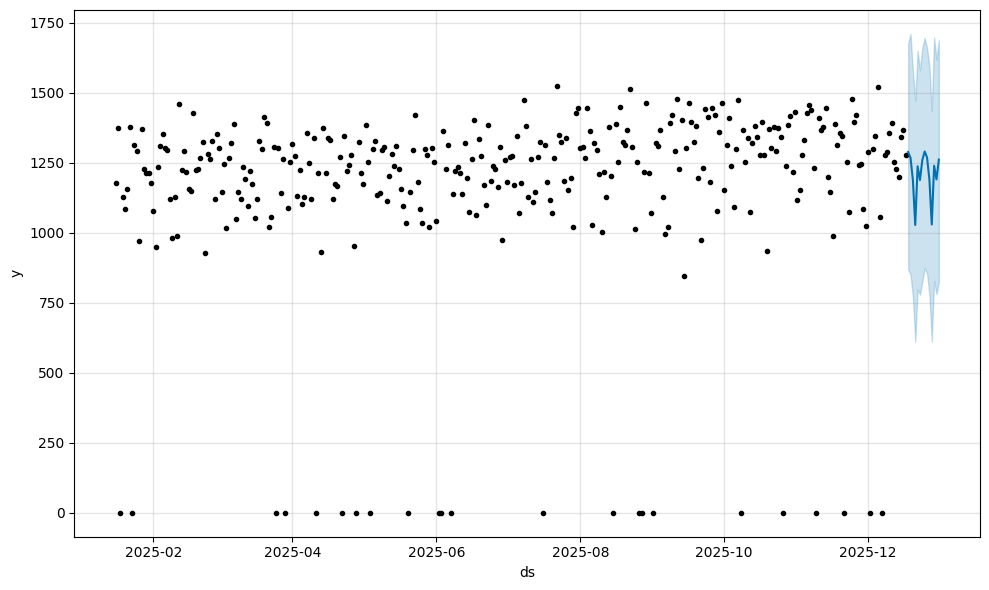

In [11]:
# Plot forecast
model.plot(forecast_df);